## Parte 1 - Instalando e importando bibliotecas que serão utilizadas

executar os códigos no terminal!

<code>conda create --yes --name workshop1 python=3.7</code>

<code>conda activate workshop1</code>

<code>conda install jupyterlab=2.2.6</code>

<code>conda install -c conda-forge pyproj=2.4.2.post1</code>

<code>conda install -c conda-forge descartes=1.1.0</code>

<code>conda install -c conda-forge geopandas=0.8.1</code>

<code>conda install -c conda-forge geopy=2.0.0</code>

<code>conda install pandas</code>

<code>conda install numpy</code>

<code>conda install matplotlib</code>

In [1]:
# Importando bibliotecas que serao utilizadas
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj
import shapely.wkt
import seaborn as sns
import geopy.distance
from shapely.geometry import Point
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%matplotlib inline

## Parte 2 - Importando as informações do DataSet proposta para o projeto

In [2]:
# lendo o conjunto de dados
df = pd.read_csv('Real_State_Properati.csv', sep = '\t')
df_original = df.copy()

## Parte 3 - Entender o que cada coluna significa.

property_type : Tipo de propriedade.

place_name : Nome do bairro.

country_name : Nome do pais.

state_name: Localidade da propriedade.

lat : Latitude

lon : Longitude

price : Preco publicado na propaganda.

currency : tipo de moeda utilizada no anuncio.

surface_total_in_m2 : metragem da area do imovel.

## Parte 3 - Entender o que cada coluna significa.

Tipo de propriedade.
Nome do bairro.
Nome do pais.
Localização da propriedade.
Latitude
Longitude
Preço publicado na propaganda.
tipo de moeda utilizada no anuncio.
metragem da area do imovel.

In [3]:
# checando as primeiras linhas do conjunto
df.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0


## Após avaliar como os dados estão distribuídos no dataset, nota-se que não existem valores nulos.

In [4]:
# informação das colunas para ver se existem campos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


## Convertendo os valores de habitação que estão precificados em Peso Argentino para Dólares dos EUA
Após avaliação inicial nota-se que grande parte das informações estão precificadas em USD

In [5]:
# convertendo preços com moeda ARS para USD

#1 ARS =  0.0085 USD

df['price_ajustado'] = df['price']

df['currency_ajustado'] = df['currency']

df.loc[df['currency'] =='ARS', 'price_ajustado'] = df['price'] * 0.0085

df.loc[df['currency'] =='ARS', 'currency_ajustado'] = df['currency'] = 'USD'

df['price_m2'] = df['price_ajustado'] / df['surface_total_in_m2'] # Variável target é o preço por metro quadrado

Criando o campo com os pontos plotados na Argentina

In [6]:
# criando o campo da geometria

df['geometry'] = gpd.points_from_xy(df['lat'], df['lon'])
df.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,price_ajustado,currency_ajustado,price_m2,geometry
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,62000.0,USD,1127.272727,POINT (-34.66182 -58.50884)
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,72000.0,USD,1309.090909,POINT (-34.65226 -58.52298)
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,138000.0,USD,3066.666667,POINT (-34.55987 -58.44336)
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0,195000.0,USD,3000.000000,POINT (-34.55987 -58.44336)
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,239000.0,USD,1707.142857,POINT (-34.65236 -58.50162)


## Avaliando distribuição dos dados.

#### Nota-se que todos os nossos dados estão localizados na Argentina e em sua Capital Federal (Buenos Aires).

#### Os dados das habitações estão concentrados em casas classificadas como "Apartamentos"

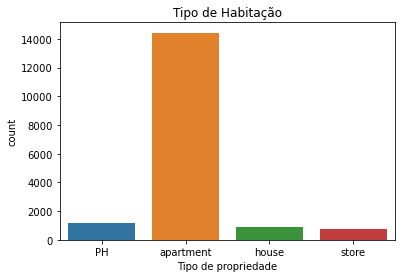

In [7]:
# grande parte dos imoveis estão concentrados em apartamentos
sns.countplot(data = df, x = 'property_type')
plt.title('Tipo de Habitação')
plt.xlabel('Tipo de propriedade')
plt.show()

In [8]:
df['place_name'].value_counts(normalize = True) * 100

Palermo            8.720896
Belgrano           8.686059
Caballito          8.064797
Recoleta           5.811996
Flores             5.184927
                     ...   
Parque Chas        0.087093
Palermo Viejo      0.058062
Villa Soldati      0.040643
Villa Riachuelo    0.017419
Catalinas          0.005806
Name: place_name, Length: 62, dtype: float64

In [9]:
df['place_name'].unique()

array(['Mataderos', 'Belgrano', 'Palermo', 'Flores', 'Boedo',
       'Las Cañitas', 'Puerto Madero', 'Balvanera', 'Caballito', 'Nuñez',
       'Floresta', 'Barracas', 'Recoleta', 'Congreso', 'Villa Crespo',
       'Chacarita', 'Almagro', 'Constitución', 'Colegiales',
       'Villa Urquiza', 'Barrio Norte', 'Palermo Hollywood', 'Saavedra',
       'Paternal', 'Agronomía', 'Villa Pueyrredón', 'Coghlan',
       'Parque Centenario', 'San Telmo', 'Monserrat', 'Boca',
       'Parque Avellaneda', 'San Cristobal', 'Abasto', 'Versalles',
       'Villa del Parque', 'Monte Castro', 'Retiro', 'Capital Federal',
       'Parque Chas', 'Palermo Chico', 'Villa Devoto', 'Palermo Soho',
       'Centro / Microcentro', 'Liniers', 'Tribunales', 'Once',
       'San Nicolás', 'Parque Chacabuco', 'Velez Sarsfield', 'Catalinas',
       'Pompeya', 'Parque Patricios', 'Palermo Viejo', 'Villa Lugano',
       'Villa Luro', 'Villa General Mitre', 'Villa Ortuzar',
       'Villa Santa Rita', 'Villa Soldati', 'Villa Re

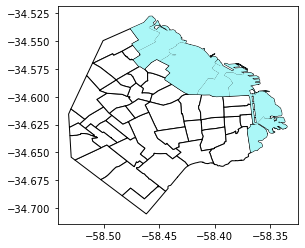

In [10]:
df_bairros = pd.read_csv("Neighborhoods.csv", 
                         encoding = 'latin1'
                        )

import shapely.wkt

df_bairros["WKT"] = df_bairros["WKT"].apply(shapely.wkt.loads) 
geo_bairros = gpd.GeoDataFrame(df_bairros, geometry = 'WKT')

fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_bairros.plot(ax = ax,
                 color = 'white',
                 edgecolor = 'black'
                )

labels_subconjunto = ['PUERTO MADERO','BELGRANO', 'PALERMO', 'RETIRO', 'BOCA', 'RECOLETA', 'NUÑEZ']   #escolher o subconjunto !!!

geo_subconjunto = geo_bairros.loc[geo_bairros['NEIGHBORHOOD'].isin(labels_subconjunto)]

geo_subconjunto.plot(ax = ax,
                    color = '#abf7f7'
                    # edge_color = 'red'
                    )

plt.show();

In [11]:
#Escolhemos com propósito o subconjunto de imóveis, 'apartamentos na zona litorânea'

bairros_subconjunto = ['Puerto Madero', 'Palermo', 'Belgrano', 'Retiro', 'Boca', 'Recoleta', 'Nuñez']
mask_subconjunto = (df['place_name'].isin(bairros_subconjunto)) & (df['property_type'].isin(['apartment']))

df_subconjunto = df[mask_subconjunto]

In [12]:
df_subconjunto.sample(10)

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,price_ajustado,currency_ajustado,price_m2,geometry
11967,apartment,Belgrano,Argentina,Capital Federal,-34.563901,-58.466787,108000.0,USD,36.0,108000.0000,USD,3000.000000,POINT (-34.56390 -58.46679)
16454,apartment,Recoleta,Argentina,Capital Federal,-34.589546,-58.397364,498000.0,USD,250.0,498000.0000,USD,1992.000000,POINT (-34.58955 -58.39736)
16883,apartment,Recoleta,Argentina,Capital Federal,-34.601095,-58.398118,1414106.0,USD,33.0,12019.9010,USD,364.239424,POINT (-34.60109 -58.39812)
16369,apartment,Belgrano,Argentina,Capital Federal,-34.573897,-58.433877,305000.0,USD,85.0,305000.0000,USD,3588.235294,POINT (-34.57390 -58.43388)
2580,apartment,Palermo,Argentina,Capital Federal,-34.597676,-58.415846,185000.0,USD,75.0,185000.0000,USD,2466.666667,POINT (-34.59768 -58.41585)
14308,apartment,Belgrano,Argentina,Capital Federal,-34.569867,-58.457581,6050989.0,USD,98.0,51433.4065,USD,524.830679,POINT (-34.56987 -58.45758)
3502,apartment,Palermo,Argentina,Capital Federal,-34.590517,-58.410287,250000.0,USD,114.0,250000.0000,USD,2192.982456,POINT (-34.59052 -58.41029)
14765,apartment,Palermo,Argentina,Capital Federal,-34.576889,-58.423479,390000.0,USD,78.0,390000.0000,USD,5000.000000,POINT (-34.57689 -58.42348)
12528,apartment,Belgrano,Argentina,Capital Federal,-34.561575,-58.465520,180000.0,USD,65.0,180000.0000,USD,2769.230769,POINT (-34.56158 -58.46552)
8047,apartment,Belgrano,Argentina,Capital Federal,-34.553474,-58.454026,116815.0,USD,38.0,116815.0000,USD,3074.078947,POINT (-34.55347 -58.45403)


### Feature Engineering

In [13]:
dict_bairro_pop = {'Palermo': 225970,  #População por Bairro (censo 2010)
                   'Puerto Madero': 6726,
                   'Belgrano': 126831,
                   'Retiro': 65413,
                   'Boca': 45113,
                   'Recoleta': 157932,
                   'Nuñez': 51949}

dict_bairro_pop_dens = {'Palermo': 14324, #Densidade populacional por Bairro (pop/km2, censo 2010)
                        'Puerto Madero': 1338,
                        'Belgrano': 15978,
                        'Retiro': 14450,
                        'Boca': 8981,
                        'Recoleta': 25100,
                        'Nuñez': 11943}

dict_boas_universidades = {'Palermo': 1, #Se o bairro tem várias e boas universidades
                           'Puerto Madero': 0,
                           'Belgrano': 0,
                           'Retiro': 1,
                           'Boca': 0,
                           'Recoleta': 1,
                           'Nuñez': 0}

dict_pontos_turisticos = {'Palermo': 1, #Se o bairro tem pontos turísticos interessantes (talvez seja melhor calcular distâncias e adicionar pesos a cada um dos pontos turísticos)
                          'Puerto Madero': 1,
                          'Belgrano': 0,
                          'Retiro': 1,
                          'Boca': 0,
                          'Recoleta': 1,
                          'Nuñez': 0}

In [14]:
df_subconjunto['bairro_pop'] = df_subconjunto['place_name'].map(dict_bairro_pop)
df_subconjunto['bairro_pop_dens'] = df_subconjunto['place_name'].map(dict_bairro_pop_dens)
df_subconjunto['boas_unis'] = df_subconjunto['place_name'].map(dict_boas_universidades)
df_subconjunto['ptos_turisticos'] = df_subconjunto['place_name'].map(dict_pontos_turisticos)

c:\Users\Felipe\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Felipe\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Felipe\anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [15]:
df_subconjunto.sample(5)

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,price_ajustado,currency_ajustado,price_m2,geometry,bairro_pop,bairro_pop_dens,boas_unis,ptos_turisticos
11112,apartment,Belgrano,Argentina,Capital Federal,-34.560210,-58.469261,230000.0,USD,98.0,230000.0,USD,2346.938776,POINT (-34.56021 -58.46926),126831,15978,0,0
13166,apartment,Palermo,Argentina,Capital Federal,-34.586982,-58.421364,255000.0,USD,103.0,255000.0,USD,2475.728155,POINT (-34.58698 -58.42136),225970,14324,1,1
13217,apartment,Palermo,Argentina,Capital Federal,-34.567952,-58.433747,284727.0,USD,72.0,284727.0,USD,3954.541667,POINT (-34.56795 -58.43375),225970,14324,1,1
13274,apartment,Recoleta,Argentina,Capital Federal,-34.589703,-58.383498,990000.0,USD,233.0,990000.0,USD,4248.927039,POINT (-34.58970 -58.38350),157932,25100,1,1
16838,apartment,Recoleta,Argentina,Capital Federal,-34.587080,-58.401070,240000.0,USD,85.0,240000.0,USD,2823.529412,POINT (-34.58708 -58.40107),157932,25100,1,1


In [16]:
df_subconjunto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4524 entries, 2 to 17221
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   property_type        4524 non-null   object  
 1   place_name           4524 non-null   object  
 2   country_name         4524 non-null   object  
 3   state_name           4524 non-null   object  
 4   lat                  4524 non-null   float64 
 5   lon                  4524 non-null   float64 
 6   price                4524 non-null   float64 
 7   currency             4524 non-null   object  
 8   surface_total_in_m2  4524 non-null   float64 
 9   price_ajustado       4524 non-null   float64 
 10  currency_ajustado    4524 non-null   object  
 11  price_m2             4524 non-null   float64 
 12  geometry             4524 non-null   geometry
 13  bairro_pop           4524 non-null   int64   
 14  bairro_pop_dens      4524 non-null   int64   
 15  boas_unis           

In [17]:
df = df_subconjunto.copy() #Renomeando o subconjunto para o dataframe original (assim mantemos a parte de limpeza dos dados sem alterações de código)

## Nota-se que os valores dos apartamentos contém diversos outliers.

### As observações consideradas outliers serão removidas.

## Remoção de Outliers - Coluna Tamanho da habitação

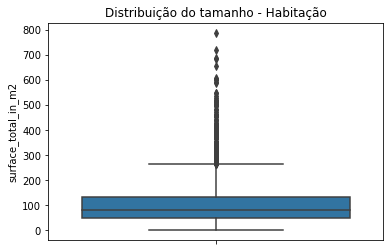

In [18]:
sns.boxplot(data = df, y ='surface_total_in_m2')
plt.title('Distribuição do tamanho - Habitação')
plt.show()

In [19]:
q3, q1 = np.percentile(df['surface_total_in_m2'], [75, 25])

interquartil = q3 - q1

limsup = q3 + 1.5 * interquartil
print(f'Limite superior do corte: {limsup}')


Limite superior do corte: 264.0


In [20]:
df = df.drop(df[df['surface_total_in_m2'] > limsup].index)
df.shape

(4287, 17)

In [21]:
# retirar metragem = 0

zeros = df['surface_total_in_m2'] == 0
df = df[~zeros]

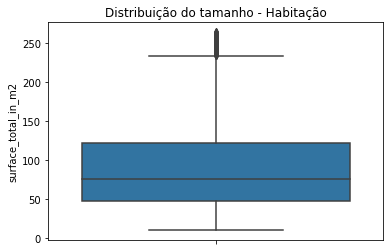

In [22]:
sns.boxplot(data = df, y = 'surface_total_in_m2')
plt.title('Distribuição do tamanho - Habitação')
plt.show()

In [23]:
# df[['surface_total_in_m2', 'distancia', 'price_m2']].sort_values(by = 'surface_total_in_m2', ascending= True).head(20)  
#Pode ser interessante retirar os imóveis com área muito pequena

## Remoção de Outliers - Coluna preço

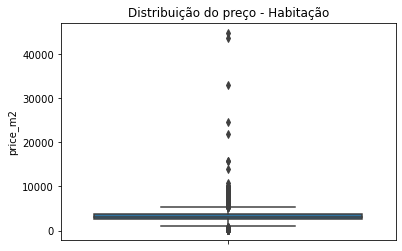

In [24]:
# distribuição do preço
sns.boxplot(data= df, y='price_m2')
plt.title('Distribuição do preço - Habitação')
plt.show()

In [25]:
q3, q1 = np.percentile(df['price_m2'], [75, 25])

interquartil = q3 - q1

limsup = q3 + 1.5 * interquartil
print(f'Limite superior do corte: {limsup}')

Limite superior do corte: 5410.0


In [26]:
df = df.drop(df[df['price_m2'] > limsup].index)
df.shape

(3944, 17)

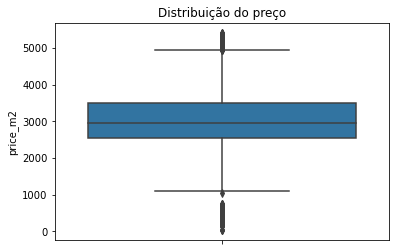

In [27]:
# distribuição do preço
sns.boxplot(data= df, y='price_m2')
plt.title('Distribuição do preço')
plt.show()

## Calculando a distância de cada propriedade para o marco zero da argentina

### Removendo 1 outlier presente nos dados (ditância 630km do centro)

In [28]:
# calculando distancia para o centro

ponto_marcozero = (-34.609447506344914, -58.38743491792922)

In [29]:
for i in df.index:
    df.loc[i, 'distancia'] = geopy.distance.geodesic(ponto_marcozero,
                                                     (df.loc[i, 'geometry'].x,
                                                      df.loc[i, 'geometry'].y)
                                                     ).kilometers

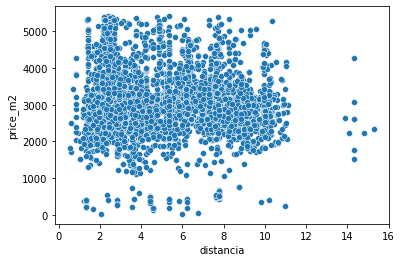

In [30]:
sns.scatterplot(
    data=df,
    y = 'price_m2',
    x = 'distancia'
)
plt.show()

In [31]:
df['distancia'].describe()

count    3944.000000
mean        5.384274
std         2.783545
min         0.548568
25%         2.692615
50%         5.202070
75%         7.879374
max        15.299520
Name: distancia, dtype: float64

In [32]:
_i = df[df['distancia'] > 600].index

df.drop(_i, inplace=True)
df.shape

(3944, 18)

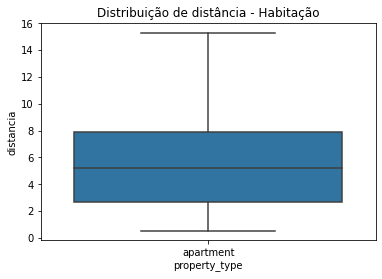

In [33]:
sns.boxplot(data = df,
            y = 'distancia',
            x = 'property_type'
            )
plt.title('Distribuição de distância - Habitação')
plt.show()

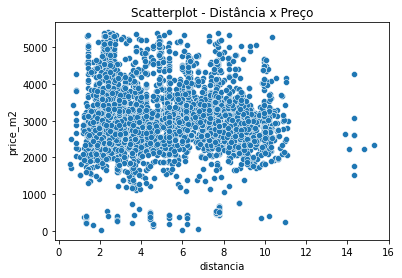

In [34]:
sns.scatterplot(
    data=df,
    y = 'price_m2',
    x = 'distancia'
)
plt.title('Scatterplot - Distância x Preço')
plt.show()

In [35]:
df.shape

(3944, 18)

## Checando a correlação de Features e Target

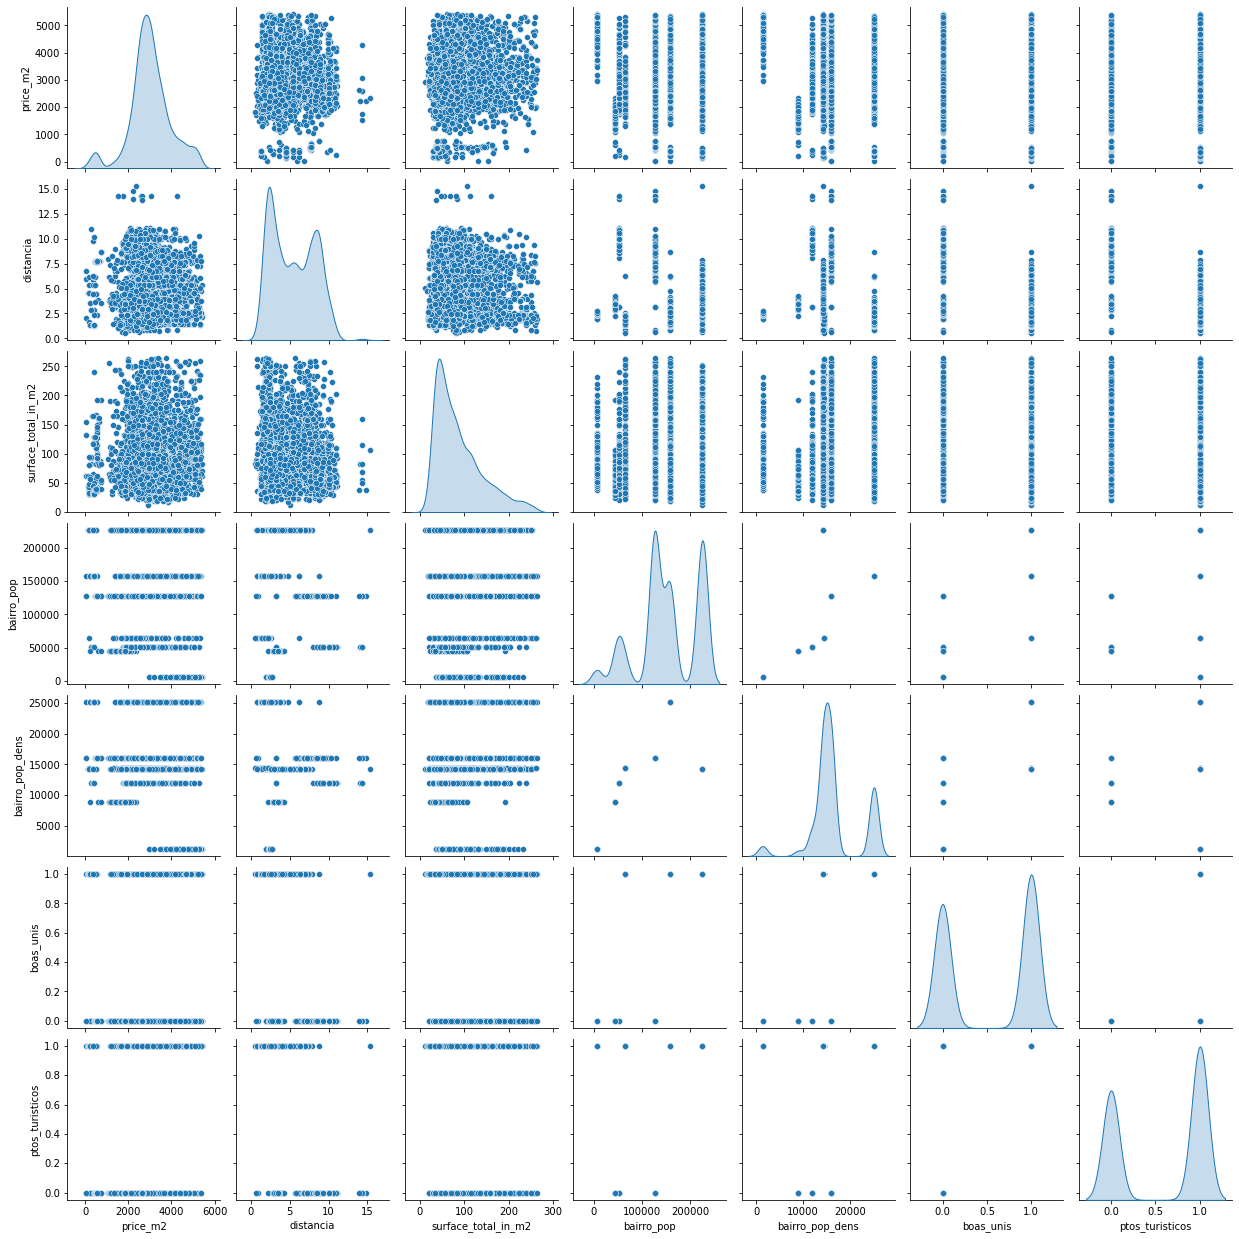

In [36]:
features_e_target = ['price_m2', 'distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos']

sns.pairplot(df[features_e_target], diag_kind = 'kde');

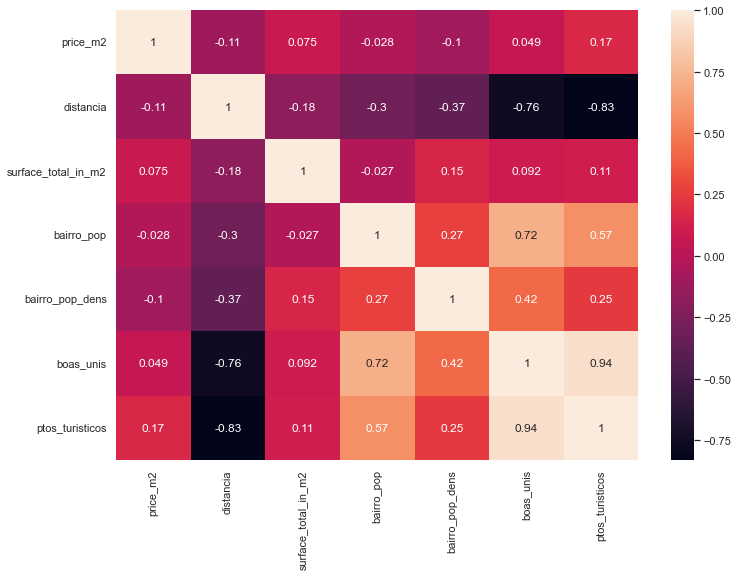

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df[features_e_target].corr(), annot=True);

## Selecionando colunas que serão utilizadas na criação do modelo.

In [38]:
features = ['distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos']

X = df[features]
y = df['price_m2']

print(f'Shape das features: {X.shape}')
print(f'Shape do target: {y.shape}')

Shape das features: (3944, 6)
Shape do target: (3944,)


In [39]:
# # separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56)

print(f'Número de observações em treino: {X_train.shape[0]}')
print(f'Número de observações em teste: {X_test.shape[0]}')


Número de observações em treino: 2760
Número de observações em teste: 1184


In [40]:
from sklearn.preprocessing import StandardScaler

scaleX = StandardScaler()

numericos = ['distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens']

X_train[numericos] = scaleX.fit_transform(X_train[numericos])  #Normalizando apenas os dados numéricos!! (antes normalizava dummies também, o que fazia o modelo prever pior)
X_test[numericos] = scaleX.transform(X_test[numericos])  #Normaliza dados de teste de acordo com Standard Scaler fit dos dados de treino

In [41]:
# criando constante do modelo OLS
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
non_reg_OLS = model.fit()
non_reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_m2   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     81.25
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           7.48e-94
Time:                        14:53:23   Log-Likelihood:                -22565.
No. Observations:                2760   AIC:                         4.514e+04
Df Residuals:                    2753   BIC:                         4.518e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2658.0289     51.717     51.396      0.000    2556.621    2759.437
distancia             216.2289     35.795      6.041      0.000     146.041     286.417
surface_total_in_m2    39.9665     16.891      2.366      0.018       6.847      73.086
bairro_pop             64.6044     28.510      2.266      0.024       8.701     120.508
bairro_pop_dens       137.4332     24.097      5.703      0.000      90.183     184.684
boas_unis           -2411.0922    158.701    -15.193      0.000   -2722.278   -2099.907
ptos_turisticos      2845.3053    153.157     18.578      0.000    2544.992    3145.619
==============================================================================
Omnibus:                      160.386   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.747
Skew:                          -0.351   Prob(JB):                     9.40e-83
Kurtosis:                       4.671   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
pd.DataFrame(X_train).head()

,const,distancia,surface_total_in_m2,bairro_pop,bairro_pop_dens,boas_unis,ptos_turisticos
5459,1.0,0.556787,-0.395080,-0.418088,-0.101202,0,0
2581,1.0,-1.020852,1.907362,-2.379424,-2.910227,0,1
12982,1.0,0.156937,0.653186,1.200870,-0.418560,1,1
1593,1.0,-1.099026,-0.975371,0.089797,1.649066,1,1
13017,1.0,-1.181405,-1.237437,0.089797,1.649066,1,1


In [43]:
parametros = pd.DataFrame(non_reg_OLS.params, columns = ['Non Reg. OLS'])

### Aplicando o predict do modelo

In [44]:
# predizendo respostas

predictions_OLS = non_reg_OLS.predict(X_test)
predictions_OLS = pd.DataFrame(predictions_OLS, columns=['Pred. non_reg_OLS'])
predictions_OLS.head()

,Pred. non_reg_OLS
8998,2921.931436
12008,2789.167174
16335,3144.714551
16016,4701.702630
8918,2829.707793


In [45]:
from statsmodels.api import graphics

# sm.graphics.plot_regress_exog(non_reg_OLS, 'price_m2')

In [46]:
# fig, ax = plt.subplots(3, 3, sharey = 'row')

# ax[0, 0].lmplot(x="surface_total_in_m2", y="price_m2", data=df)

# ax[0, 1].hist(data_normal_2, label = 'data normal 2', alpha = 0.7);

# ax[0, 2].hist(data_normal_3, label = 'data normal 3', alpha = 1, color = "yellow")

# ax[1, 0].scatter(data_x, 50 * data_cos, marker = '+', color = (1.0, 0.2, 0.3), label = 'serie cos', alpha = 0.7)

# ax[1, 1].scatter(data_x, 60 * (data_cos + 1), marker = '*', color = "blue", label = 'serie cos modif', alpha = 1)

# ax[1, 2].hist(data_normal_1, label = 'data normal 1', alpha = 0.7, color = "lightblue")

# ax[1, 0].legend();

# grid = sns.FacetGrid(df, row = "sex", col = "time", margin_titles = True)

# h = sns.jointplot(x="surface_total_in_m2", y="price_m2", data=df, kind="reg")

Text(0.5, 1.0, 'Pred. OLS x Resíduos')

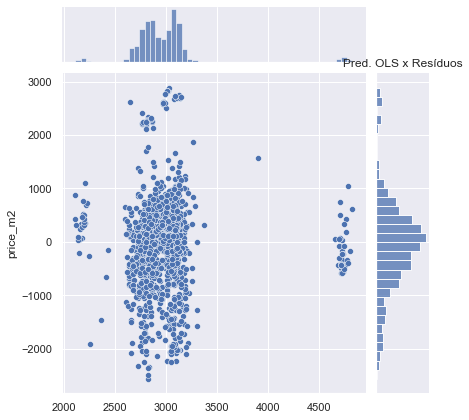

In [47]:
predito = np.array(predictions_OLS).reshape(len(predictions_OLS),)
resids = predito - y_test

g = sns.jointplot(x = predito, y = resids)
plt.title(label= 'Pred. OLS x Resíduos')

## Segundo modelo, utilizando Regularização Lasso e com Cross-Validation

In [48]:
from sklearn import linear_model, metrics

lassoCV = linear_model.LassoCV(alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10], 
                               cv = 5
                              ).fit(X_train, y_train)

predictions_lassoCV = lassoCV.predict(X_test)
predictions_lassoCV = pd.DataFrame(predictions_lassoCV, columns=['Pred. Lasso Reg'])

lassoCV.score(X_train, y_train)

0.15043605369068835

In [49]:
best_alpha_lasso = lassoCV.alpha_

reg_lassoCV = model.fit_regularized(alpha = best_alpha_lasso, L1_wt = 1)

parametros_lassoCV = pd.DataFrame(reg_lassoCV.params, columns = ['Lasso Reg. OLS'])

comparacao_params = parametros.join(parametros_lassoCV)

comparacao_params

,Non Reg. OLS,Lasso Reg. OLS
const,2658.028899,2561.755672
distancia,216.228856,185.815984
surface_total_in_m2,39.966455,47.839206
bairro_pop,64.604369,-67.850121
bairro_pop_dens,137.433184,20.868816
boas_unis,-2411.092225,-1198.639306
ptos_turisticos,2845.305303,1856.422788


## Terceiro modelo, utilizando Regularização Ridge e com Cross-Validation

In [50]:
ridgeCV = linear_model.RidgeCV(alphas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50], 
                             cv = 5,
                             scoring = 'r2'
                            )

ridgeCV.fit(X_train, y_train)
predictions_ridgeCV = ridgeCV.predict(X_test)
predictions_ridgeCV = pd.DataFrame(predictions_ridgeCV, columns=['Pred. Ridge Reg'])

ridgeCV.score(X_train, y_train)

0.15043255800281297

In [51]:
best_alpha_ridge = ridgeCV.alpha_

reg_ridgeCV = model.fit_regularized(alpha = best_alpha_ridge, L1_wt = 0)

parametros_ridgeCV = pd.DataFrame(reg_ridgeCV.params, columns = ['Ridge Reg. OLS']).set_index(comparacao_params.index)

comparacao_params = comparacao_params.join(parametros_ridgeCV, on = comparacao_params.index)

comparacao_params

,Non Reg. OLS,Lasso Reg. OLS,Ridge Reg. OLS
const,2658.028899,2561.755672,1994.425835
distancia,216.228856,185.815984,276.957536
surface_total_in_m2,39.966455,47.839206,50.070013
bairro_pop,64.604369,-67.850121,-299.353185
bairro_pop_dens,137.433184,20.868816,-109.682814
boas_unis,-2411.092225,-1198.639306,508.312488
ptos_turisticos,2845.305303,1856.422788,859.001521


## Quarto modelo, utilizando Regularização Elastic Net e com Cross-Validation

In [52]:
elastic_NetCV = linear_model.ElasticNetCV(l1_ratio = [0.85, 0.9, 0.95, 0.99, 1], 
                                    cv = 5,
                                    random_state= 2
                                    )

elastic_NetCV.fit(X_train, y_train)
predictions_elastic_NetCV = elastic_NetCV.predict(X_test)
predictions_elastic_NetCV = pd.DataFrame(predictions_elastic_NetCV, columns=['Pred. ElasticNet Reg'])

elastic_NetCV.score(X_train, y_train)

0.1504289711608804

In [53]:
best_alpha_elasticNet = elastic_NetCV.alpha_

reg_elastic_NetCV = model.fit_regularized(alpha = best_alpha_elasticNet, L1_wt = elastic_NetCV.l1_ratio_)

parametros_elastic_NetCV = pd.DataFrame(reg_elastic_NetCV.params, columns = ['ElasticNet Reg. OLS']).set_index(comparacao_params.index)

comparacao_params = comparacao_params.join(parametros_elastic_NetCV, on = comparacao_params.index)

comparacao_params

,Non Reg. OLS,Lasso Reg. OLS,Ridge Reg. OLS,ElasticNet Reg. OLS
const,2658.028899,2561.755672,1994.425835,2562.546655
distancia,216.228856,185.815984,276.957536,184.349245
surface_total_in_m2,39.966455,47.839206,50.070013,47.777992
bairro_pop,64.604369,-67.850121,-299.353185,-68.273083
bairro_pop_dens,137.433184,20.868816,-109.682814,19.553623
boas_unis,-2411.092225,-1198.639306,508.312488,-1188.577782
ptos_turisticos,2845.305303,1856.422788,859.001521,1845.357301


In [54]:
print(best_alpha_ridge, best_alpha_lasso, best_alpha_elasticNet)

0.1 1e-05 0.11808059406979782


## Quinto modelo, utilizando ARDRegression e com Cross-Validation

In [55]:
from sklearn.model_selection import KFold, cross_val_score
ard_reg = linear_model.ARDRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

cv_scores = cross_val_score(ard_reg,
                            X_train,
                            y_train,
                            cv = kf
                            )

ard_reg.fit(X_train, y_train)

predictions_ArdReg = ard_reg.predict(X_test)
predictions_ArdReg = pd.DataFrame(predictions_ArdReg, columns=['Pred. ARD Reg'])

cv_scores

array([0.15115374, 0.12324619, 0.12472465, 0.19542718, 0.1268659 ])

In [56]:
ard_reg.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'n_iter': 300,
 'normalize': 'deprecated',
 'threshold_lambda': 10000.0,
 'tol': 0.001,
 'verbose': False}

In [57]:
print(features)
print('y_test sample VS. ARD Reg. pred.: \n', y_test[0:10])
print('y_pred sample: ', predictions_ArdReg[0:10].astype(int))
print('MAE: ', metrics.mean_absolute_error(y_test, predictions_ArdReg))
print('MSE: ', metrics.mean_squared_error(y_test, predictions_ArdReg))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions_ArdReg)))
print('R2: ', metrics.r2_score(y_test, predictions_ArdReg))
print('MAPE: ', metrics.mean_absolute_percentage_error(y_test, predictions_ArdReg))

['distancia', 'surface_total_in_m2', 'bairro_pop', 'bairro_pop_dens', 'boas_unis', 'ptos_turisticos']
y_test sample VS. ARD Reg. pred.: 
 8998     2916.666667
12008    4615.384615
16335    3270.833333
16016    3951.612903
8918     2846.153846
15487    4200.000000
16628    2539.682540
6199     5296.610169
7195     3228.571429
5315     3000.000000
Name: price_m2, dtype: float64
y_pred sample:     Pred. ARD Reg
0           2909
1           2785
2           3126
3           4700
4           2827
5           4705
6           2894
7           3173
8           2759
9           3016
MAE:  639.19912833045
MSE:  773422.4315257926
RMSE:  879.4443879665118
R2:  0.131302972105529
MAPE:  0.4838109114071393


## Adicionando métricas ao df de Comaparação de Parâmetros

In [58]:
nan_list = []
for i in range(0,len(features)+1):
    nan_list.append(np.NaN)

comparacao_params['ARD Regression'] = nan_list

comparacao_params.loc['MAE'] = [metrics.mean_absolute_error(y_test, predictions_OLS),
                                metrics.mean_absolute_error(y_test, predictions_lassoCV),
                                metrics.mean_absolute_error(y_test, predictions_ridgeCV),
                                metrics.mean_absolute_error(y_test, predictions_elastic_NetCV),
                                metrics.mean_absolute_error(y_test, predictions_ArdReg)
                                ]

comparacao_params.loc['MAPE'] = [metrics.mean_absolute_percentage_error(y_test, predictions_OLS),
                                 metrics.mean_absolute_percentage_error(y_test, predictions_lassoCV),
                                 metrics.mean_absolute_percentage_error(y_test, predictions_ridgeCV),
                                 metrics.mean_absolute_percentage_error(y_test, predictions_elastic_NetCV),
                                 metrics.mean_absolute_percentage_error(y_test, predictions_ArdReg)
                                 ]

comparacao_params.loc['RMSE'] = [np.sqrt(metrics.mean_squared_error(y_test, predictions_OLS)),
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_lassoCV)),
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_ridgeCV)),
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_elastic_NetCV)),
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions_ArdReg))
                                 ]

comparacao_params.loc['R2'] = [metrics.r2_score(y_test, predictions_OLS),
                               metrics.r2_score(y_test, predictions_lassoCV),
                               metrics.r2_score(y_test, predictions_ridgeCV),
                               metrics.r2_score(y_test, predictions_elastic_NetCV),
                               metrics.r2_score(y_test, predictions_ArdReg)
                               ]

print('                        Tabela Comparativa - Paramêtros e Métricas')
comparacao_params

                        Tabela Comparativa - Paramêtros e Métricas


,Non Reg. OLS,Lasso Reg. OLS,Ridge Reg. OLS,ElasticNet Reg. OLS,ARD Regression
const,2658.028899,2561.755672,1994.425835,2562.546655,NaN
distancia,216.228856,185.815984,276.957536,184.349245,NaN
surface_total_in_m2,39.966455,47.839206,50.070013,47.777992,NaN
bairro_pop,64.604369,-67.850121,-299.353185,-68.273083,NaN
bairro_pop_dens,137.433184,20.868816,-109.682814,19.553623,NaN
boas_unis,-2411.092225,-1198.639306,508.312488,-1188.577782,NaN
ptos_turisticos,2845.305303,1856.422788,859.001521,1845.357301,NaN
MAE,638.773482,638.773496,638.887390,638.931454,639.199128
MAPE,0.483357,0.483357,0.483420,0.483453,0.483811
RMSE,879.032371,879.032372,879.035822,879.043082,879.444388


## Comparativo das predições

In [59]:
#Juntando predição de cada modelo

comparacao_preditos = pd.DataFrame(np.array(y_test), columns = ['y_test'])
comparacao_preditos = comparacao_preditos.join(predictions_OLS, on = y_test.index)
comparacao_preditos = comparacao_preditos.join(predictions_lassoCV, on = comparacao_preditos.index)
comparacao_preditos = comparacao_preditos.join(predictions_ridgeCV, on = comparacao_preditos.index)
comparacao_preditos = comparacao_preditos.join(predictions_elastic_NetCV, on = comparacao_preditos.index)

comparacao_preditos = comparacao_preditos.join(predictions_ArdReg, on = comparacao_preditos.index)

comparacao_preditos

,y_test,Pred. non_reg_OLS,Pred. Lasso Reg,Pred. Ridge Reg,Pred. ElasticNet Reg,Pred. ARD Reg
0,2916.666667,2921.931436,2921.931321,2921.189324,2920.575489,2909.745663
1,4615.384615,2789.167174,2789.167147,2788.995695,2788.841260,2785.434868
2,3270.833333,3144.714551,3144.714507,3144.579751,3144.191515,3126.449945
3,3951.612903,4701.702630,4701.701984,4695.557392,4694.082955,4700.644962
4,2846.153846,2829.707793,2829.707714,2829.106353,2828.778491,2827.746935
...,...,...,...,...,...,...
1179,2092.105263,3082.521988,3082.521977,3082.488070,3082.401360,3079.937566
1180,3437.500000,2857.776934,2857.776899,2857.707686,2857.367318,2842.916184
1181,2538.461538,3110.771304,3110.771187,3109.786138,3109.386221,3111.626365
1182,4710.743802,2866.684934,2866.684867,2866.301973,2865.895080,2855.945324


eval_env: 1


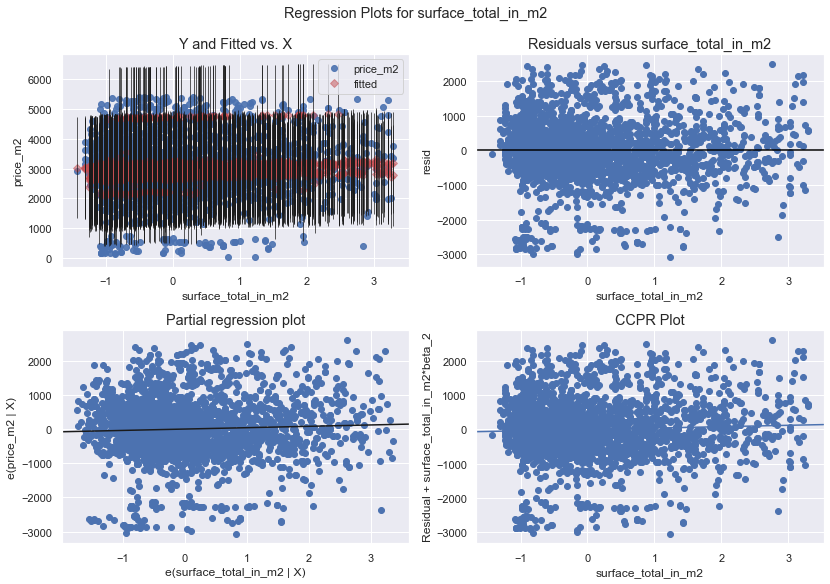

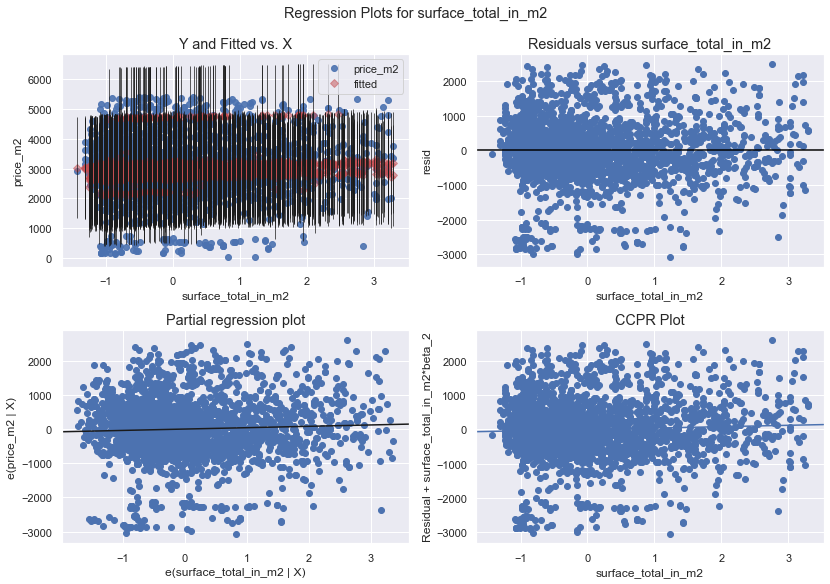

In [60]:
from statsmodels.api import graphics

sm.graphics.plot_regress_exog(non_reg_OLS, exog_idx=2)

In [61]:
# top 5 bairros com maior média de preço

# df[['place_name', 'price_m2']].groupby('place_name').mean('price_m2').sort_values(by = 'price_m2', ascending = False).round(2).head(5)

### *Future use

In [62]:
# from sklearn.model_selection import cross_val_score, KFold
# kf = KFold(n_splits = 5,
#            shuffle = True,
#            random_state = 12
#           )

# cv_scores = cross_val_score(model,
#                             X_train, 
#                             y_train, 
#                             cv = kf
#                             )

# cv_scores